In [1]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%config InlineBackend.figure_format = 'retina'
import numpy

# @title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import interact, fixed, HBox, Layout, VBox, interactive, Label, interact_manual
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")



with open('slice_data.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)


data = raw_data['PPC_RS']
n_column = data.iloc[0,:].size
starting_index = np.arange (1,n_column+1, 15)
cell_list = []

#separate the cells from one sheet

for i in starting_index:
    cell_data = data.iloc[:,i:i+13]
    cell_list.append(cell_data)


clamp_levels = data.iloc[0,1:14]
clamp_levels_string = pd.Series(clamp_levels, dtype="string")
col_list = list(clamp_levels_string)

In [2]:
def into_dict(data):
    n_column = data.iloc[0,:].size
    starting_index = np.arange (1,n_column+1, 15)

    cell_list = []
    clamp_levels = data.iloc[0,1:14]
    clamp_levels_string = pd.Series(clamp_levels, dtype="string")
    col_label = list(clamp_levels_string)


    #separate the cells from one sheet

    for i in starting_index:
        cell_data = data.iloc[:,i:i+13]
        cell_list.append(cell_data)

    num_neuron = len(cell_list)
    cell_id_list = []


    for i in range(num_neuron):
        col_list = list(cell_list[i].columns)
        cell_id = col_list[0]
        cell_id_list.append(cell_id)


    num_neuron = len(cell_list)
    cell_id_list = []
    for i in range(num_neuron):
        col_list = list(cell_list[i].columns)
        cell_id = col_list[0]
        cell_id_list.append(cell_id)
        sheet_time = data.iloc[1:,0]


    for i in range(num_neuron):
        cell_list[i].columns = col_label
        cell_list[i] = cell_list[i].iloc[1:,:]


    cell_dic = {}

    cell_dic['time'] = sheet_time
    cell_dic['data'] = cell_list
    cell_dic['cell_id'] =  cell_id_list

    return cell_dic

In [3]:
ppc_rs = into_dict(raw_data['PPC_RS'])
acc_rs = into_dict(raw_data['ACC_RS'])

acc_fs = into_dict(raw_data['ACC_FS'])
ppc_fs = into_dict(raw_data['PPC_FS'])

In [27]:
#compare the membrane potetials of ppc and pfc 


# bring the ppc data 


def overlap_mp(input_data, start, end, trial_num, point_idx):

    for i in range(trial_num):
        
        plt.plot(input_data['time'].iloc[start:end], input_data['data'][i]['-200.0'].iloc[start:end], 'c', alpha = 0.3, linewidth= 2)
        plt.plot(input_data['time'].iloc[start:end], input_data['data'][point_idx]['-200.0'].iloc[start:end], 'r', alpha = 0.7, linewidth= 2)
        
        
    plt.ylabel('memrane potential (mV)')
    plt.xlabel('time (ms)')
    plt.show()

In [5]:
# remove one item first and second, and third 

def remove_cell(data_set, remove_list):
    
    # sort the index based on order 
    
    remove_list.sort()
    
    num_deleted = 0
    
    for i in remove_list:
        i = i - num_deleted
        data_set['data'].pop(i)
        data_set['cell_id'].pop(i)
        num_deleted += 1
        print(num_deleted)
    
    return data_set
    
    

In [6]:
remove_list = [0, 5, 10]


In [7]:
_= remove_cell(acc_rs, remove_list)


1
2
3


In [22]:
def before_sweep(input_data, start, end):
    
    output = []
    cell_num = len(input_data['data'])
    

    for i in range(cell_num):
        
        output.append(input_data['data'][i]['-200.0'].iloc[start:end])
    
    return output

In [23]:
before_sweep_acc = before_sweep(acc_rs, 0, 1000)


In [24]:
before_sweep_acc

[1      -70.1294
 2      -70.1294
 3      -70.1294
 4      -70.1294
 5      -70.1294
          ...   
 996    -69.9463
 997    -69.9768
 998    -69.9463
 999    -69.9768
 1000   -69.9463
 Name: -200.0, Length: 1000, dtype: float64,
 1      -77.9419
 2      -77.9419
 3      -77.9419
 4      -77.9724
 5      -77.9419
          ...   
 996    -77.0264
 997    -77.0569
 998    -77.0264
 999    -77.0569
 1000   -77.0569
 Name: -200.0, Length: 1000, dtype: float64,
 1      -71.8079
 2      -71.7468
 3      -71.8689
 4      -71.7163
 5      -71.7468
          ...   
 996    -71.7773
 997    -71.7773
 998    -71.7163
 999    -71.7773
 1000   -71.7468
 Name: -200.0, Length: 1000, dtype: float64,
 1      -71.0144
 2      -71.0449
 3      -70.9839
 4      -71.0449
 5      -71.1975
          ...   
 996    -69.6106
 997    -69.7632
 998    -69.6411
 999    -69.7632
 1000   -69.6716
 Name: -200.0, Length: 1000, dtype: float64,
 1      -74.2493
 2      -74.2188
 3      -74.2798
 4      -74.1882
 5  

In [10]:
len(before_sweep_acc)


13

In [11]:
def rmp_stat(data_set_list):
    
    num_cell = len(data_set_list)
    num_time = len(data_set_list[0])
    rmp_mat = numpy.zeros([num_cell, num_time])
    for i in range((num_cell)):
        rmp_mat[i,:] = data_set_list[i]
    
    rmp_mean = numpy.mean(rmp_mat, axis=0)
    rmp_sem = numpy.std(rmp_mat, axis=0)/numpy.sqrt(num_cell)
    
    return rmp_mean, rmp_sem
    
    

In [12]:
before_sweep_acc = before_sweep(acc_rs, 0, 1000)


/var/folders/m3/n1grw1z148sb_3wvhh_2rncr0000gn/T/ipykernel_3493/1724184458.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  output.append(input_data['data'][i]['-200.0'][start:end])


In [13]:
before_sweep_ppc = before_sweep(ppc_rs, 0, 1000)


/var/folders/m3/n1grw1z148sb_3wvhh_2rncr0000gn/T/ipykernel_3493/1724184458.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  output.append(input_data['data'][i]['-200.0'][start:end])


In [14]:
[rmp_mean_acc, rmp_sem_acc] = rmp_stat(before_sweep_acc)


In [15]:
[rmp_mean_ppc, rmp_sem_ppc] = rmp_stat(before_sweep_ppc)


In [16]:
time_n = len(rmp_mean_ppc)


/var/folders/m3/n1grw1z148sb_3wvhh_2rncr0000gn/T/ipykernel_3493/2661579570.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(acc_rs['time'][:time_n], rmp_mean_acc, 'm-', label='mean_1', linewidth=0.8)
/var/folders/m3/n1grw1z148sb_3wvhh_2rncr0000gn/T/ipykernel_3493/2661579570.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.fill_between(acc_rs['time'][:time_n], rmp_mean_acc - rmp_sem_acc, rmp_mean_acc + rmp_sem_acc, color='m', alpha=0.2, label='_nolegend_')
/var/

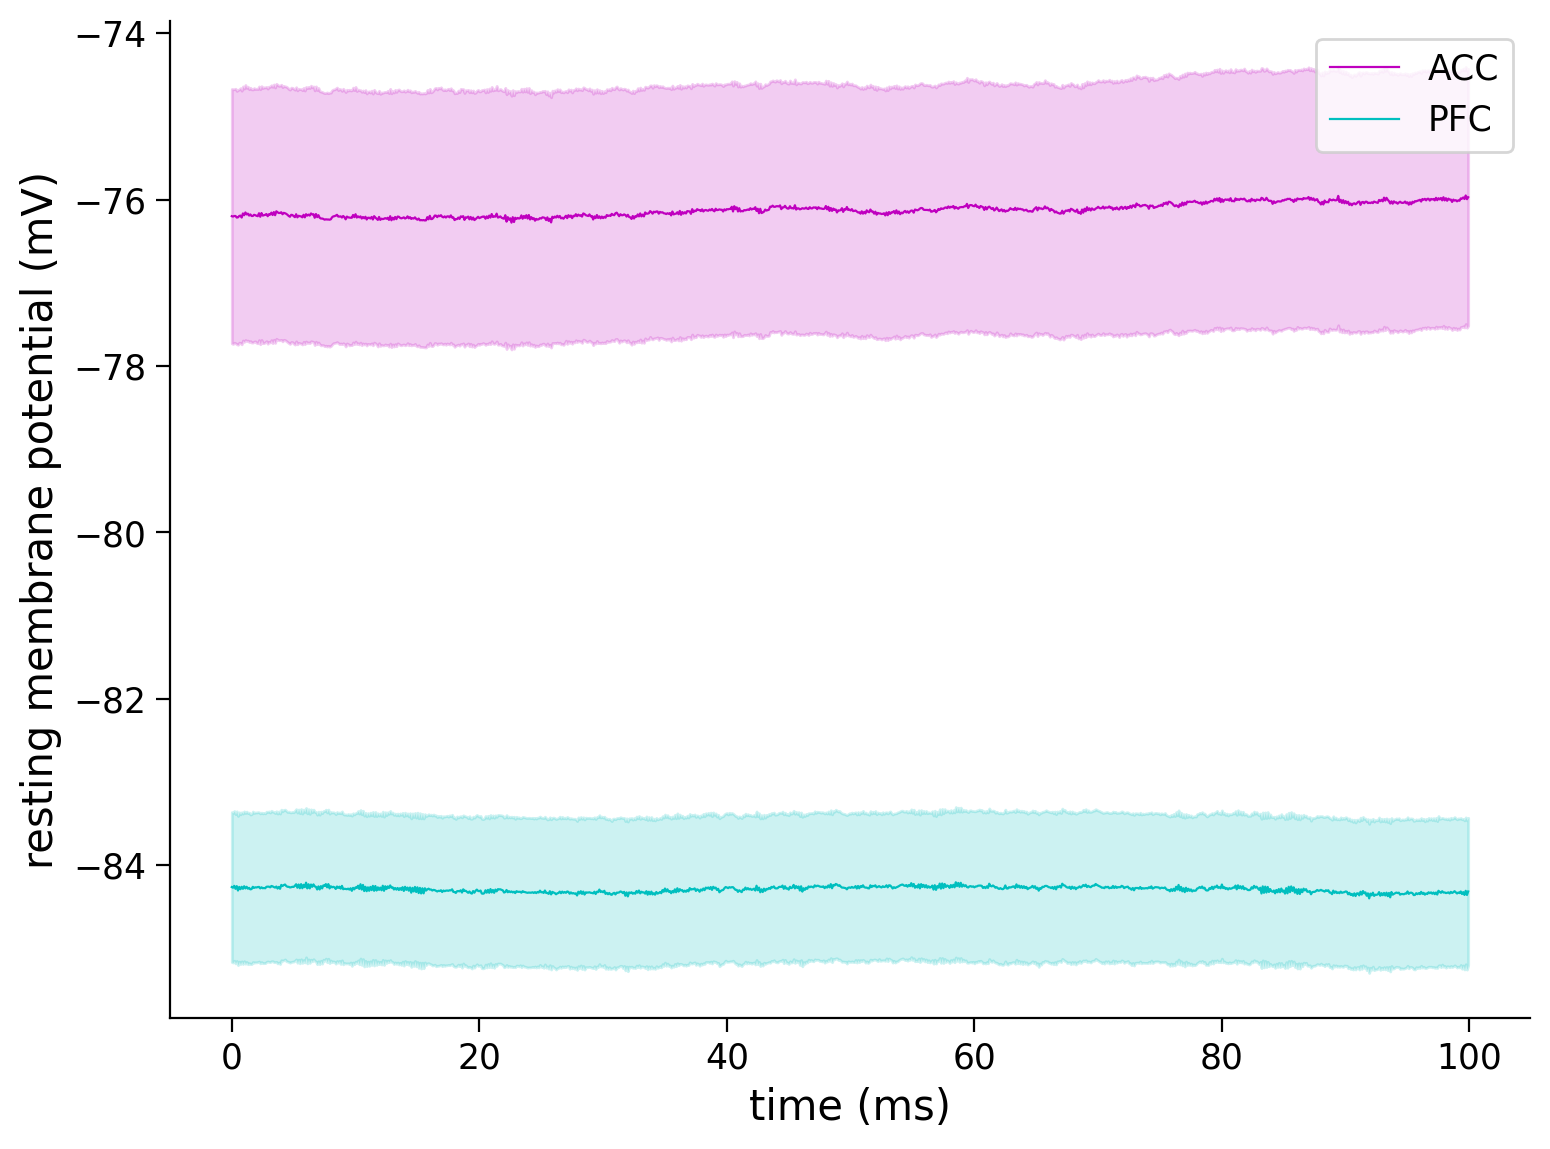

In [17]:
plt.plot(acc_rs['time'][:time_n], rmp_mean_acc, 'm-', label='mean_1', linewidth=0.8)
plt.fill_between(acc_rs['time'][:time_n], rmp_mean_acc - rmp_sem_acc, rmp_mean_acc + rmp_sem_acc, color='m', alpha=0.2, label='_nolegend_')

plt.plot(acc_rs['time'][:time_n], rmp_mean_ppc, 'c-', label='mean_1', linewidth=0.8)
plt.fill_between(acc_rs['time'][:time_n], rmp_mean_ppc - rmp_sem_ppc, rmp_mean_ppc + rmp_sem_ppc, color='c', alpha=0.2, label='_nolegend_')


plt.ylabel('resting membrane potential (mV)')
plt.xlabel('time (ms)')

plt.legend(['ACC','PFC' ])


plt.show()


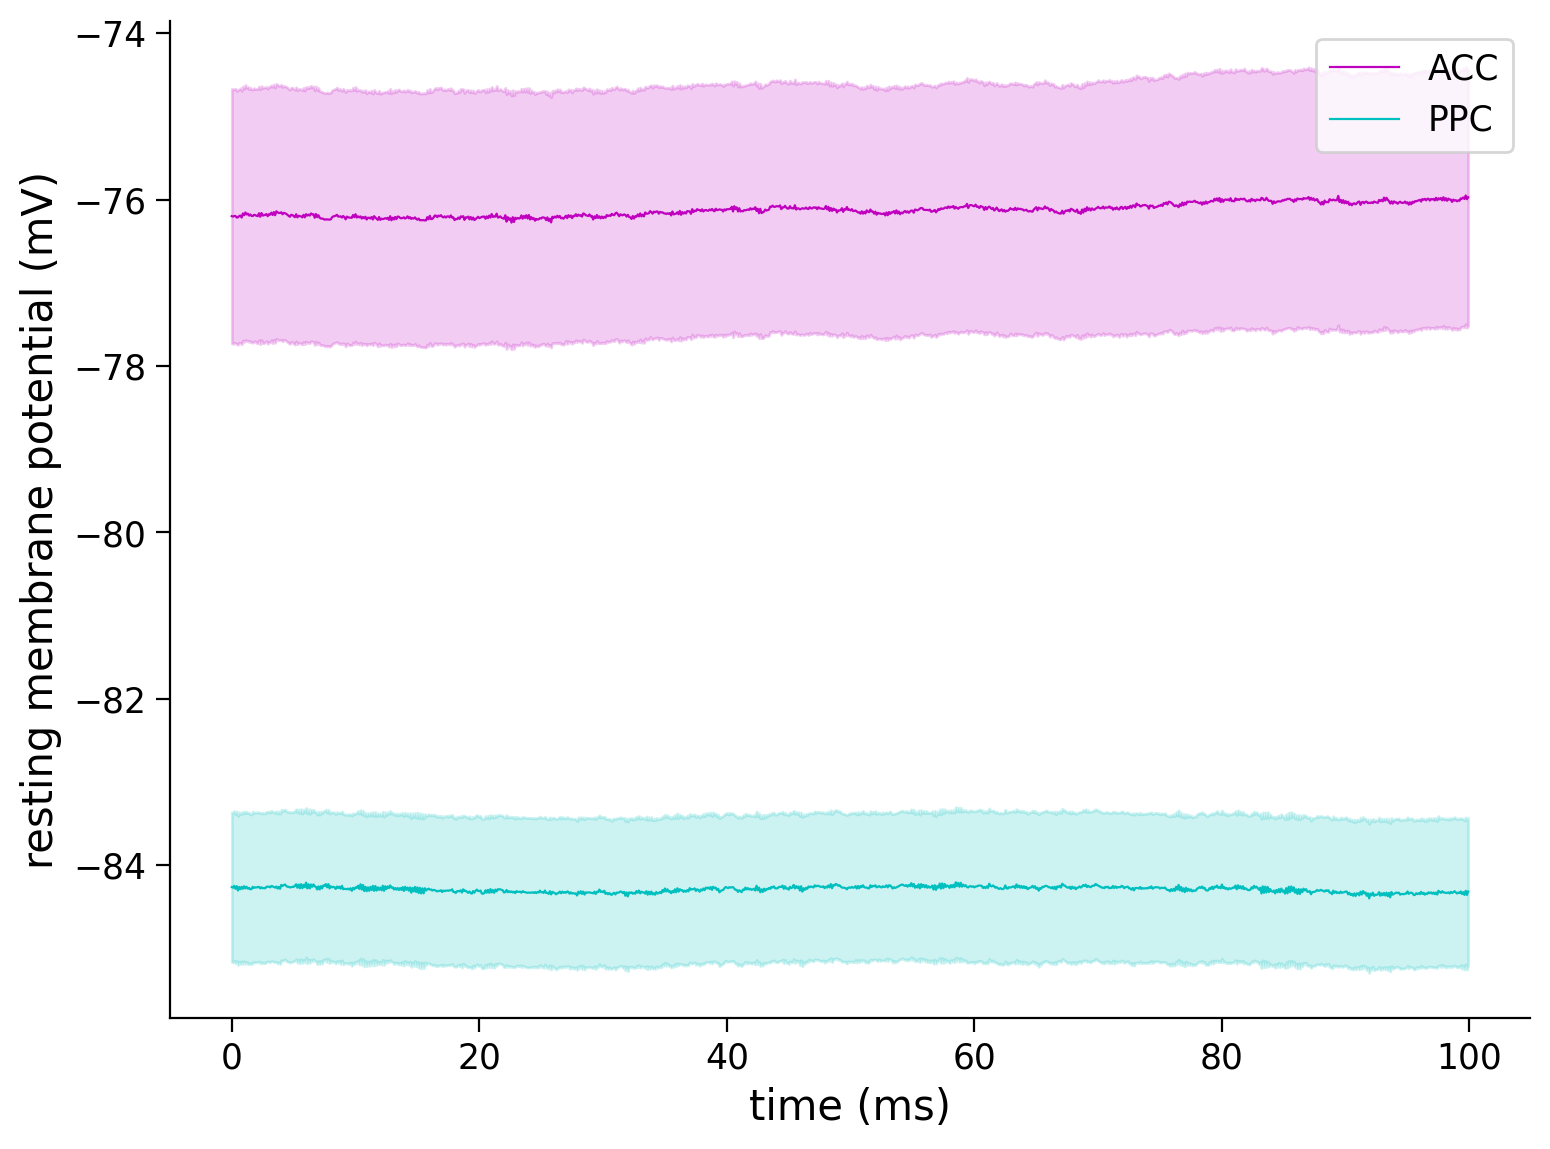

In [21]:
plt.plot(acc_rs['time'].iloc[:time_n], rmp_mean_acc, 'm-', label='mean_1', linewidth=0.8)
plt.fill_between(acc_rs['time'].iloc[:time_n], rmp_mean_acc - rmp_sem_acc, rmp_mean_acc + rmp_sem_acc, color='m', alpha=0.2, label='_nolegend_')

plt.plot(acc_rs['time'].iloc[:time_n], rmp_mean_ppc, 'c-', label='mean_1', linewidth=0.8)
plt.fill_between(acc_rs['time'].iloc[:time_n], rmp_mean_ppc - rmp_sem_ppc, rmp_mean_ppc + rmp_sem_ppc, color='c', alpha=0.2, label='_nolegend_')


plt.ylabel('resting membrane potential (mV)')
plt.xlabel('time (ms)')

plt.legend(['ACC','PPC' ])


plt.show()


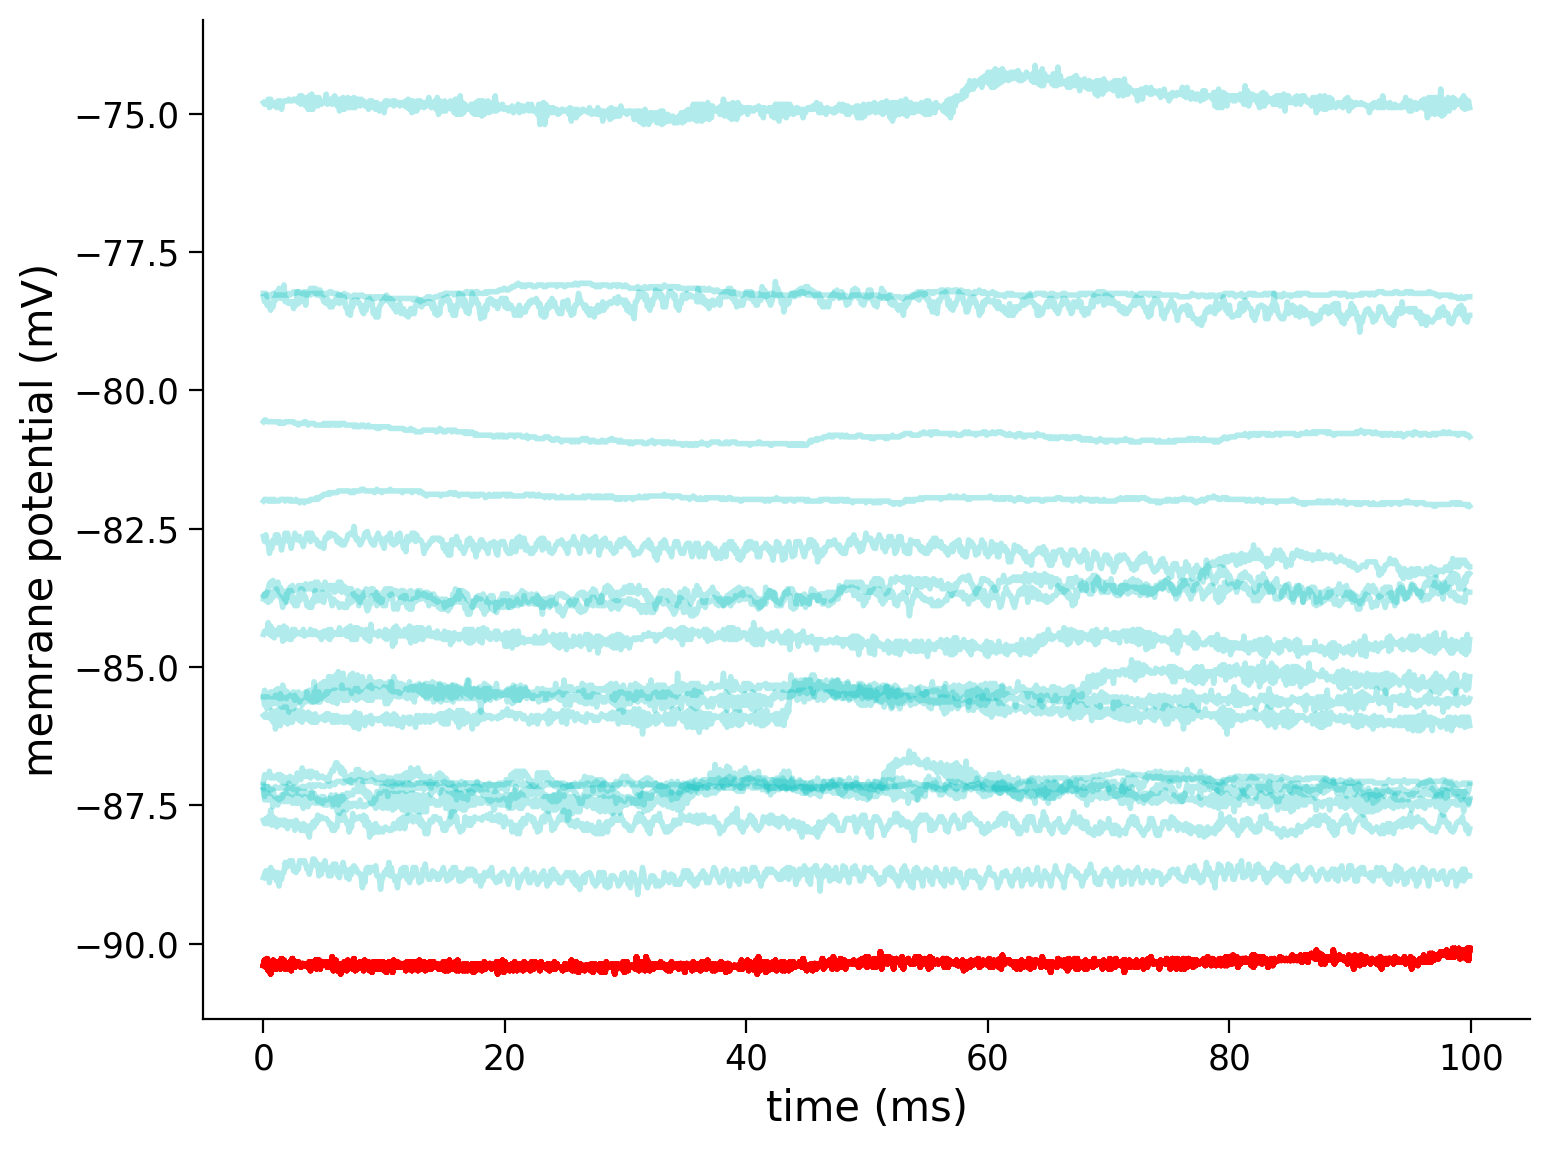

In [28]:
overlap_mp(ppc_rs, 0, 1000, 19, 0)


In [29]:
ppc_rs

{'time': 1           0.000000
 2           0.100000
 3           0.200000
 4           0.300000
 5           0.400000
             ...     
 10996    1099.500000
 10997    1099.599976
 10998    1099.699951
 10999    1099.800049
 11000    1099.900024
 Name: Unnamed: 0, Length: 11000, dtype: float64,
 'data': [        -200.0   -150.0   -100.0    -50.0      0.0     50.0    100.0    150.0  \
  1     -90.3931 -89.9658 -90.1794 -90.0879 -90.0574 -90.1794 -90.0574 -90.1489   
  2     -90.3015 -89.9963 -90.1794 -90.1794 -90.0879 -90.1489 -90.0574 -90.2710   
  3     -90.4236 -90.0269 -90.1794 -90.1184 -89.8743 -90.1489 -90.0574 -90.2100   
  4     -90.2710 -90.0269 -90.0574 -90.2710 -89.9963 -90.1794 -90.0574 -90.2710   
  5     -90.4846 -90.0574 -90.1184 -90.1794 -89.9963 -90.0879 -90.0574 -90.1794   
  ...        ...      ...      ...      ...      ...      ...      ...      ...   
  10996 -90.1489 -90.1489 -90.1184 -89.9658 -90.2405 -90.0574 -90.0879 -90.2405   
  10997 -90.1794 -90.1489 -9

In [31]:
ppc_rs.keys()

dict_keys(['time', 'data', 'cell_id'])

In [35]:
ppc_rs['data']

[        -200.0   -150.0   -100.0    -50.0      0.0     50.0    100.0    150.0  \
 1     -90.3931 -89.9658 -90.1794 -90.0879 -90.0574 -90.1794 -90.0574 -90.1489   
 2     -90.3015 -89.9963 -90.1794 -90.1794 -90.0879 -90.1489 -90.0574 -90.2710   
 3     -90.4236 -90.0269 -90.1794 -90.1184 -89.8743 -90.1489 -90.0574 -90.2100   
 4     -90.2710 -90.0269 -90.0574 -90.2710 -89.9963 -90.1794 -90.0574 -90.2710   
 5     -90.4846 -90.0574 -90.1184 -90.1794 -89.9963 -90.0879 -90.0574 -90.1794   
 ...        ...      ...      ...      ...      ...      ...      ...      ...   
 10996 -90.1489 -90.1489 -90.1184 -89.9658 -90.2405 -90.0574 -90.0879 -90.2405   
 10997 -90.1794 -90.1489 -90.2710 -90.0269 -90.1794 -90.1184 -90.1794 -90.1489   
 10998 -90.1489 -90.0879 -90.3320 -89.9963 -90.2405 -90.0879 -90.2100 -90.2710   
 10999 -90.1489 -90.0574 -90.2100 -89.8743 -90.2100 -90.0879 -90.1489 -90.1794   
 11000 -90.0574 -90.2405 -90.1489 -90.1184 -90.1184 -90.0879 -90.2405 -90.1794   
 
          200.

In [32]:
ppc_rs['cell_id']

['20190109 Slice 1_Cell 0',
 '20190220 Slice 1_Cell 0',
 '20190227 Slice 1_Cell 1',
 '20190411 Slice 1_Cell 0',
 '20190423 Slice 2_Cell 0',
 '20190423 Slice 3_Cell 0',
 '20190517 Slice 3_Cell 1',
 '20190529 Slice 5_Cell 0',
 '20190618 Slice 1_Cell 0',
 '20190419 Slice 1_Cell 0',
 '20190419 Slice 1_Cell 1',
 '20190517 Slice 1_Cell 0',
 '20190517 Slice 2_Cell 1',
 '20190528 Slice 1_Cell 1',
 '20190528 Slice 2_Cell 0',
 '20190528 Slice 3_Cell 0',
 '20190529 Slice 1_Cell 0',
 '20190529 Slice 2_Cell 0',
 '20190529 Slice 3_Cell 0']

In [61]:
# take out all rmp values 


def take_rmp(input_data, start, end, trial_num):


    num_time = len(input_data['data'][0]['-200.0'].iloc[start:end])

    rmp_mat = numpy.zeros([trial_num, num_time])

    for i in range(trial_num):
        
        #plt.plot(input_data['time'].iloc[start:end], input_data['data'][i]['-200.0'].iloc[start:end], 'c', alpha = 0.3, linewidth= 2)
        #plt.plot(input_data['time'].iloc[start:end], input_data['data'][point_idx]['-200.0'].iloc[start:end], 'r', alpha = 0.7, linewidth= 2)

        rmp_mat[i,:] = input_data['data'][i]['-200.0'].iloc[start:end]
    
    return rmp_mat
        
        


In [62]:
take_rmp

<function __main__.take_rmp(input_data, start, end, trial_num)>

In [63]:
rmp_mat = numpy.zeros([3, 4])


In [64]:


ppc_all_rmp = take_rmp(ppc_rs, 0, 1000, 19)

In [65]:
ppc_all_rmp.mean()

-84.29113174210525

In [41]:
rmp_mat[1,:]

array([0., 0., 0., 0.])

In [74]:
acc_all_rmp = take_rmp(acc_rs, 0, 1000, 13)

In [69]:
ppc_mean_rmp_by_trials = numpy.mean(ppc_all_rmp, axis = 1)

acc_all_rmp = take_rmp(acc_rs, 0, 1000, 19)

In [75]:
acc_mean_rmp_by_trials = numpy.mean(acc_all_rmp, axis = 1)


In [79]:
ppc_rmp_mean = ppc_mean_rmp_by_trials.mean()

In [78]:
acc_rmp_mean = acc_mean_rmp_by_trials.mean()

In [89]:
y = [ppc_rmp_mean,acc_rmp_mean ]

x = ['ppc', 'acc']

<BarContainer object of 2 artists>

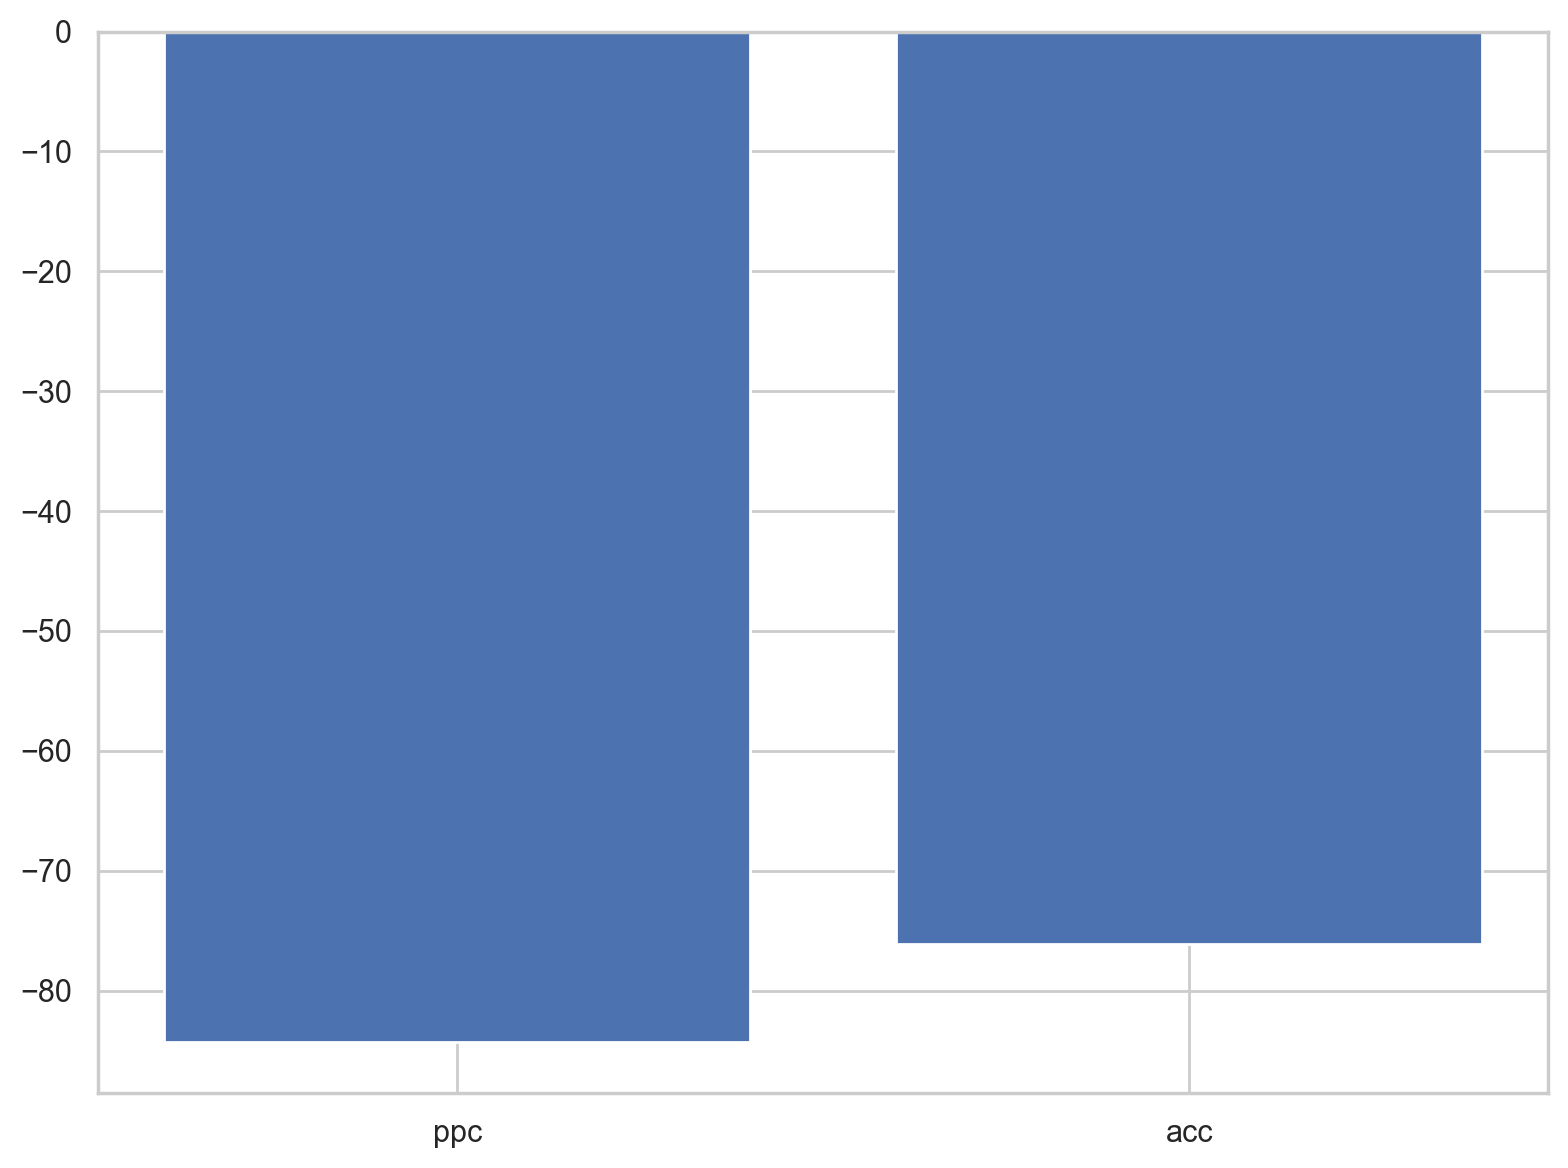

In [91]:
plt.bar(x,y)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
menMeans   = (5, 15, 30, 40)
menStd     = (2, 3, 4, 5)
ind  = np.arange(4)    # the x locations for the groups
width= 0.7
labels = ('A', 'B', 'C', 'D')

# Pull the formatting out here
bar_kwargs = {'width':width,'color':'y','linewidth':2,'zorder':5}
err_kwargs = {'zorder':0,'fmt':None,'linewidth':2,'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, menMeans, **bar_kwargs)
ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)


# Custom function to draw the diff bars

def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':2}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

# Call the function
label_diff(0,1,'p=0.0370',ind,menMeans)
label_diff(1,2,'p<0.0001',ind,menMeans)
label_diff(2,3,'p=0.0025',ind,menMeans)


plt.ylim(ymax=60)
plt.xticks(ind, labels, color='k')
plt.show()

In [83]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid")

#tips = sns.load_dataset("tips")

sns.barplot(ppc_rmp_mean)
#sns.swarmplot(x="day", y="total_bill", data=ppc_mean_rmp_by_trials, color="0", alpha=.35)

plt.show()

ValueError: Input `data` can have no more than 2 dimensions